In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import profile
import time

# Problem 1: Scheduling TV Commercials to Maximize Impact

# **Algorithmic Strategy:** Greedy (Job Sequencing)  
# **Application Domain:** Media & Advertisement  

# **Problem Description:**  
# You are given a list of commercials, each with a deadline and revenue.  
# Schedule non-overlapping commercials to maximize total revenue.

In [3]:
# List of commercials: (Ad ID, Deadline, Revenue in lakhs)
ads = [
    ('A1', 2, 60),
    ('A2', 1, 100),
    ('A3', 3, 20),
    ('A4', 2, 40),
    ('A5', 1, 20),
    ('A6', 3, 70),
    ('A7', 2, 50)
]

# Display input
ads


[('A1', 2, 60),
 ('A2', 1, 100),
 ('A3', 3, 20),
 ('A4', 2, 40),
 ('A5', 1, 20),
 ('A6', 3, 70),
 ('A7', 2, 50)]

In [4]:
def schedule_ads(ads):
    # Sort ads by revenue descending
    ads.sort(key=lambda x: x[2], reverse=True)
    
    max_deadline = max(ad[1] for ad in ads)
    slots = [None] * max_deadline
    
    total_revenue = 0
    scheduled_ads = []
    
    for ad in ads:
        # Schedule in latest available slot before deadline
        for j in range(ad[1]-1, -1, -1):
            if slots[j] is None:
                slots[j] = ad[0]
                total_revenue += ad[2]
                scheduled_ads.append(ad[0])
                break
                
    return scheduled_ads, total_revenue


In [5]:
scheduled_ads, total_revenue = schedule_ads(ads)

print("Scheduled Ads:", scheduled_ads)
print("Total Revenue (in lakhs):", total_revenue)

Scheduled Ads: ['A2', 'A6', 'A1']
Total Revenue (in lakhs): 230


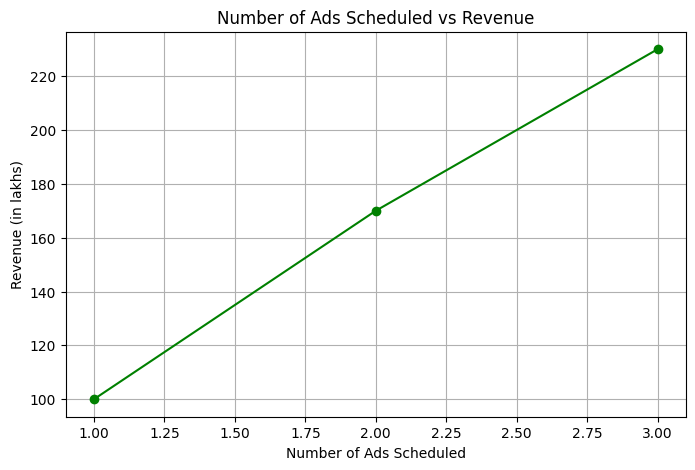

In [6]:
# Track cumulative revenue based on scheduled ads
ads_count = list(range(1, len(scheduled_ads)+1))
revenues = []

cumulative = 0
for ad_id in scheduled_ads:
    # Find revenue of the ad from dataset
    revenue = next(val[2] for val in ads if val[0] == ad_id)
    cumulative += revenue
    revenues.append(cumulative)

# Plot
plt.figure(figsize=(8,5))
plt.plot(ads_count, revenues, marker='o', linestyle='-', color='green')
plt.title("Number of Ads Scheduled vs Revenue")
plt.xlabel("Number of Ads Scheduled")
plt.ylabel("Revenue (in lakhs)")
plt.grid(True)
plt.show()
